<a href="https://colab.research.google.com/github/shaiel60/MachineLearningCourse/blob/main/Shaiel_Yehuda_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [11]:
from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()



2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

<ipython-input-12-bae4614fb31b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace(0.0, 'Malignant',inplace=True)


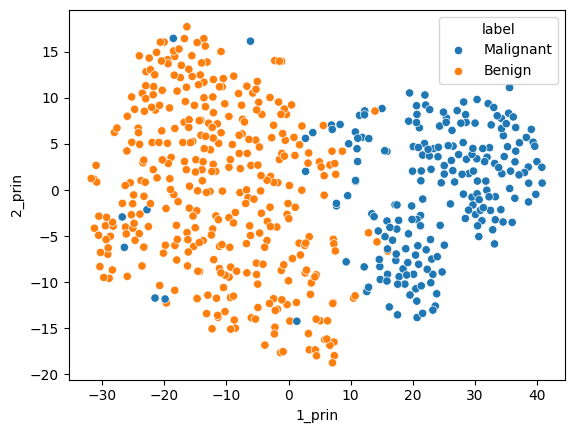

In [12]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(my_data.data)

tsne = TSNE(n_components=2)
X_reducted = tsne.fit_transform(X)
df = pd.DataFrame(data=X_reducted, columns=['1_prin', '2_prin'])
df['label'] = my_data.target
df['label'].replace(0.0, 'Malignant',inplace=True)
df['label'].replace(1.0, 'Benign',inplace=True)
sns.scatterplot(x='1_prin', y='2_prin', hue='label', data=df)
plt.show()



3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [2]:

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)
X_train, X_test, y_train, y_test = train_test_split(my_data.data, my_data.target, test_size=0.20, random_state=42)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [9]:
from sklearn.tree import DecisionTreeClassifier

# model_decision_tree = DecisionTreeClassifier(...)

model_decision_tree = DecisionTreeClassifier(max_depth=1000, min_samples_leaf=2, min_samples_split=30,random_state=42, splitter='random')

# model_decision_tree.fit(...)

model_decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=1000, min_samples_leaf=2, min_samples_split=30,
                       random_state=42, splitter='random')

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [5]:
from sklearn.ensemble import RandomForestClassifier

# model_random_forest = RandomForestClassifier(...)
model_random_forest = RandomForestClassifier()

# model_random_forest.fit(...)
model_random_forest.fit(X_train, y_train)




RandomForestClassifier()

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [12]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
model_adaboost = AdaBoostClassifier()
# model_adaboost.fit(...)
model_adaboost.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#
#creating predictions
y_prediction_DT = model_decision_tree.predict(X_test)
y_prediction_RF = model_random_forest.predict(X_test)
y_prediction_Ada = model_adaboost.predict(X_test)

#Accuracy
accuracy_DT = accuracy_score(y_test, y_prediction_DT)
accuracy_RF = accuracy_score(y_test, y_prediction_RF)
accuracy_Ada = accuracy_score(y_test, y_prediction_Ada)

# Print the accuracy scores
print(f"Decision Tree Accuracy: {accuracy_DT}")
print(f"Random Forest Accuracy: {accuracy_RF}")
print(f"AdaBoost Accuracy: {accuracy_Ada}")

# Compare and declare the winner (example)
if accuracy_DT > accuracy_RF and accuracy_DT > accuracy_Ada:
    print("Decision Tree is the most accurate.")
elif accuracy_RF > accuracy_DT and accuracy_RF > accuracy_Ada:
    print("Random Forest is the most accurate.")
else:
    print("AdaBoost is the most accurate.")

#confusion_matrix

confusion_matrix_DT = confusion_matrix(y_test, y_prediction_DT)
confusion_matrix_RF = confusion_matrix(y_test, y_prediction_RF)
confusion_matrix_Ada = confusion_matrix(y_test, y_prediction_Ada)

print("#"*100)
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix_DT}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix_RF}")
print(f"AdaBoost Confusion Matrix:\n{confusion_matrix_Ada}")

#precision
precision_DT = precision_score(y_test, y_prediction_DT)
precision_RF = precision_score(y_test, y_prediction_RF)
precision_Ada = precision_score(y_test, y_prediction_Ada)

print("#"*100)
print(f"Decision Tree Precision: {precision_DT}")
print(f"Random Forest Precision: {precision_RF}")
print(f"AdaBoost Precision: {precision_Ada}")

#recall_score

recall_DT = recall_score(y_test, y_prediction_DT)
recall_RF = recall_score(y_test, y_prediction_RF)
recall_Ada = recall_score(y_test, y_prediction_Ada)

print("#"*100)
print(f"Decision Tree Recall: {recall_DT}")
print(f"Random Forest Recall: {recall_RF}")
print(f"AdaBoost Recall: {recall_Ada}")

#f1_score

f1_DT = f1_score(y_test, y_prediction_DT)
f1_RF = f1_score(y_test, y_prediction_RF)
f1_Ada = f1_score(y_test, y_prediction_Ada)

print("#"*100)
print(f"Decision Tree F1 Score: {f1_DT}")
print(f"Random Forest F1 Score: {f1_RF}")
print(f"AdaBoost F1 Score: {f1_Ada}")

Decision Tree Accuracy: 0.9649122807017544
Random Forest Accuracy: 0.956140350877193
AdaBoost Accuracy: 0.9736842105263158
AdaBoost is the most accurate.
####################################################################################################
Decision Tree Confusion Matrix:
[[40  3]
 [ 1 70]]
Random Forest Confusion Matrix:
[[40  3]
 [ 2 69]]
AdaBoost Confusion Matrix:
[[41  2]
 [ 1 70]]
####################################################################################################
Decision Tree Precision: 0.958904109589041
Random Forest Precision: 0.9583333333333334
AdaBoost Precision: 0.9722222222222222
####################################################################################################
Decision Tree Recall: 0.9859154929577465
Random Forest Recall: 0.971830985915493
AdaBoost Recall: 0.9859154929577465
####################################################################################################
Decision Tree F1 Score: 0.9722222222222222
Random F